In [1]:
%load_ext autoreload
%autoreload 2

In [27]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from datasets import load_metric, Dataset, DatasetDict
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback
)
from einops import rearrange
from helper import VizHelper
import matplotlib.pyplot as plt

from custom_bert import BertForSequenceClassification

In [3]:
max_seq_length = 128

# AMI18

In [9]:
model_name = "./bert-base-cased_ami18/"
tokenizer_name = "bert-base-cased"

In [10]:
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
def preprocess_text(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=max_seq_length)

In [11]:
train = pd.read_csv("data/miso_train.tsv", sep="\t")
validation = pd.read_csv("data/miso_dev.tsv", sep="\t")
test = pd.read_csv("data/miso_test.tsv", sep="\t")

raw_datasets = DatasetDict(
    train=Dataset.from_pandas(train),
    validation=Dataset.from_pandas(validation),
    test=Dataset.from_pandas(test)
)
raw_datasets = raw_datasets.rename_column("misogynous", "label")
proc_datasets = raw_datasets.map(preprocess_text, batched=True, remove_columns=raw_datasets["train"].features)
proc_datasets.set_format("pt")

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [28]:
#model = AutoModelForSequenceClassification.from_pretrained(model_name).eval()
model = BertForSequenceClassification.from_pretrained(model_name).eval()

*** Calling custom BertForSequenceClassification ***


In [29]:
exp = VizHelper(model, tokenizer, raw_datasets["test"], proc_datasets["test"])

In [ ]:
exp.show_attention(idx=21, head=3, layer=10)

In [ ]:
exp.show_effective_attention(idx=21, head=3, layer=10)

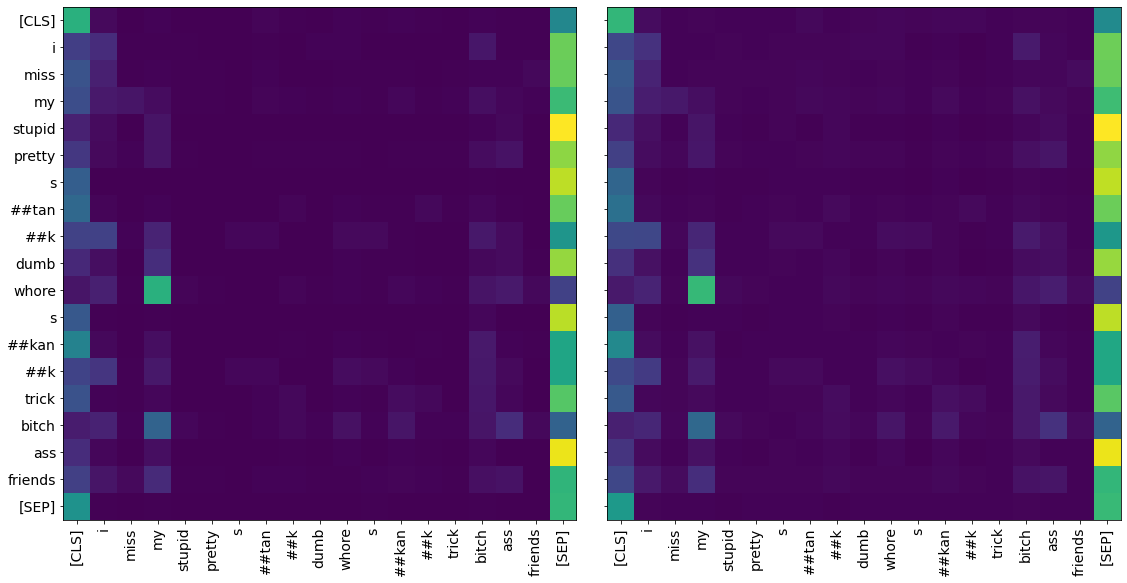

In [24]:
idx, head, layer = 21, 7, 2
fig = exp.compare_attentions(idx, head, layer)
fig.savefig(f"plots/comp_attentions_{idx}_{head}_{layer}.png", bbox_inches='tight')

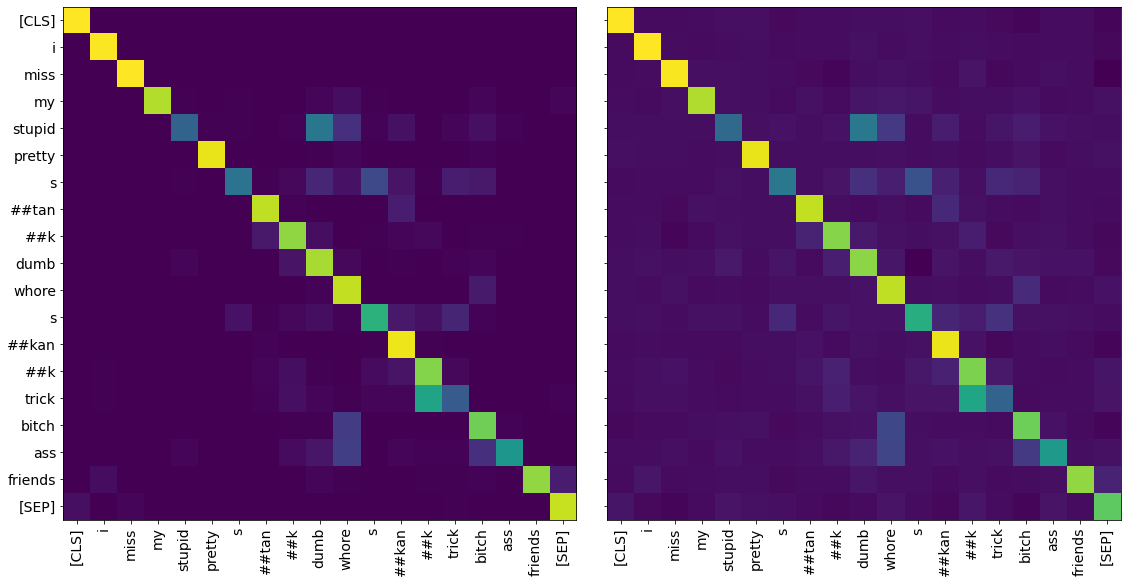

In [51]:
idx, head, layer = 21, 1, 9
fig = exp.compare_attentions(idx, head, layer)
fig.savefig(f"plots/comp_attentions_{idx}_{head}_{layer}.png", bbox_inches='tight')

In [134]:
a[0].shape

torch.Size([12, 128, 128])

In [16]:
exp.classify(21)

IDX: 21
Text: i miss my stupid pretty stank dumb whore skank trick bitch ass friends
True label: 0
Prediction: 1


In [33]:
exp.compute_table(21)

ValueError: not enough values to unpack (expected 5, got 2)